<a href="https://colab.research.google.com/github/Jayameena832/Interest-Level-estimation/blob/main/Web_Scrapping_for_posters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scraperapi-sdk ``

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from scraper_api import ScraperAPIClient
client = ScraperAPIClient('476702b93b8218fa45574b687cb0f63e')
result = client.get(url = 'http://httpbin.org/ip').text
print(result)

{
  "origin": "54.39.234.212"
}



In [4]:
result = client.get(url = 'http://httpbin.org/ip', render=True, country_code=True).text
result

'<html><head></head><body>{\n  "origin": "187.149.119.219"\n}\n</body></html>'

In [5]:
postResult = client.post(url = 'http://httpbin.org/anything', body = {'foo': 'bar'}).text
putResult = client.put(url = 'http://httpbin.org/anything', body = {'foo': 'bar'}).text
print(postResult)
print(putResult)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "foo": "bar"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Accept-Language": "en-US,en;q=0.9,fr;q=0.8,de;q=0.7", 
    "Cache-Control": "max-age=259200", 
    "Content-Length": "7", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "Sec-Ch-Ua": "Google Chrome;v=\"90\", \"Chromium\";v=\"90\", \";Not A Brand\";v=\"99\"", 
    "Sec-Ch-Ua-Mobile": "?0", 
    "Sec-Ch-Ua-Platform": "Windows", 
    "Sec-Fetch-Dest": "document", 
    "Sec-Fetch-Mode": "navigate", 
    "Sec-Fetch-Site": "none", 
    "Sec-Fetch-User": "?1", 
    "Upgrade-Insecure-Requests": "1", 
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36", 
    "X-Amzn-Trace-Id": "Root=1-62c6cf7c-3ac32e730debf94b39be596c"
  }, 
  "json": null, 
  "method": "POST", 
  "origin": "107.164.66.28", 
  "url": "http:

In [6]:
result = client.get(url = 'http://httpbin.org/ip', render=True).text
print(result)

<html><head></head><body>{
  "origin": "37.59.79.194"
}
</body></html>


In [7]:
result = client.get(url = 'http://httpbin.org/ip', headers = {"X-MyHeader": "123"}).text
print(result)

{
  "origin": "107.164.66.29"
}



In [8]:
result = client.get(url = 'http://httpbin.org/ip', session_number=123).text
print(result)

{
  "origin": "107.165.192.39"
}



In [9]:
result = client.get(url = 'http://httpbin.org/ip', country_code='us').text
print(result)

{
  "origin": "204.217.131.192"
}



In [10]:
result = client.get(url = 'https://www.amazon.com/dp/B07V1PHM66', autoparse=True).text
print(result)

{"name":"Apple MacBook Air (13-inch, 8GB RAM, 128GB Storage, 1.6GHz Intel Core i5) - Gold (Previous Model)","product_information":{},"brand":"Visit the Apple Store","brand_url":"https://www.amazon.com/stores/Apple/page/77D9E1F7-0337-4282-9DB6-B6B8FB2DC98D?ref_=ast_bln","full_description":"","pricing":"","list_price":"","availability_status":"Currently unavailable.              We don't know when or if this item will be back in stock.","images":["https://m.media-amazon.com/images/I/41Kp8-ILkYL.jpg","https://m.media-amazon.com/images/I/41mb7IKbevL.jpg","https://m.media-amazon.com/images/I/41ylYkx8lJL.jpg","https://m.media-amazon.com/images/I/21NSNFwRHaL.jpg","https://m.media-amazon.com/images/I/21crc7La49L.jpg","https://m.media-amazon.com/images/I/31VGv0DOdbL.jpg","https://m.media-amazon.com/images/I/A1XWA1MyOkL.jpg","https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/transparent-pixel.gif"],"product_category":"","average_rating":4.7,"small_description":"About this item 

In [11]:
usage = client.account()
print(usage)

{'burst': 0, 'concurrencyLimit': 5, 'concurrentRequests': 0, 'failedRequestCount': 4, 'requestCount': 674, 'requestLimit': 1000, 'subscriptionDate': '2022-06-13T00:00:00.000Z'}


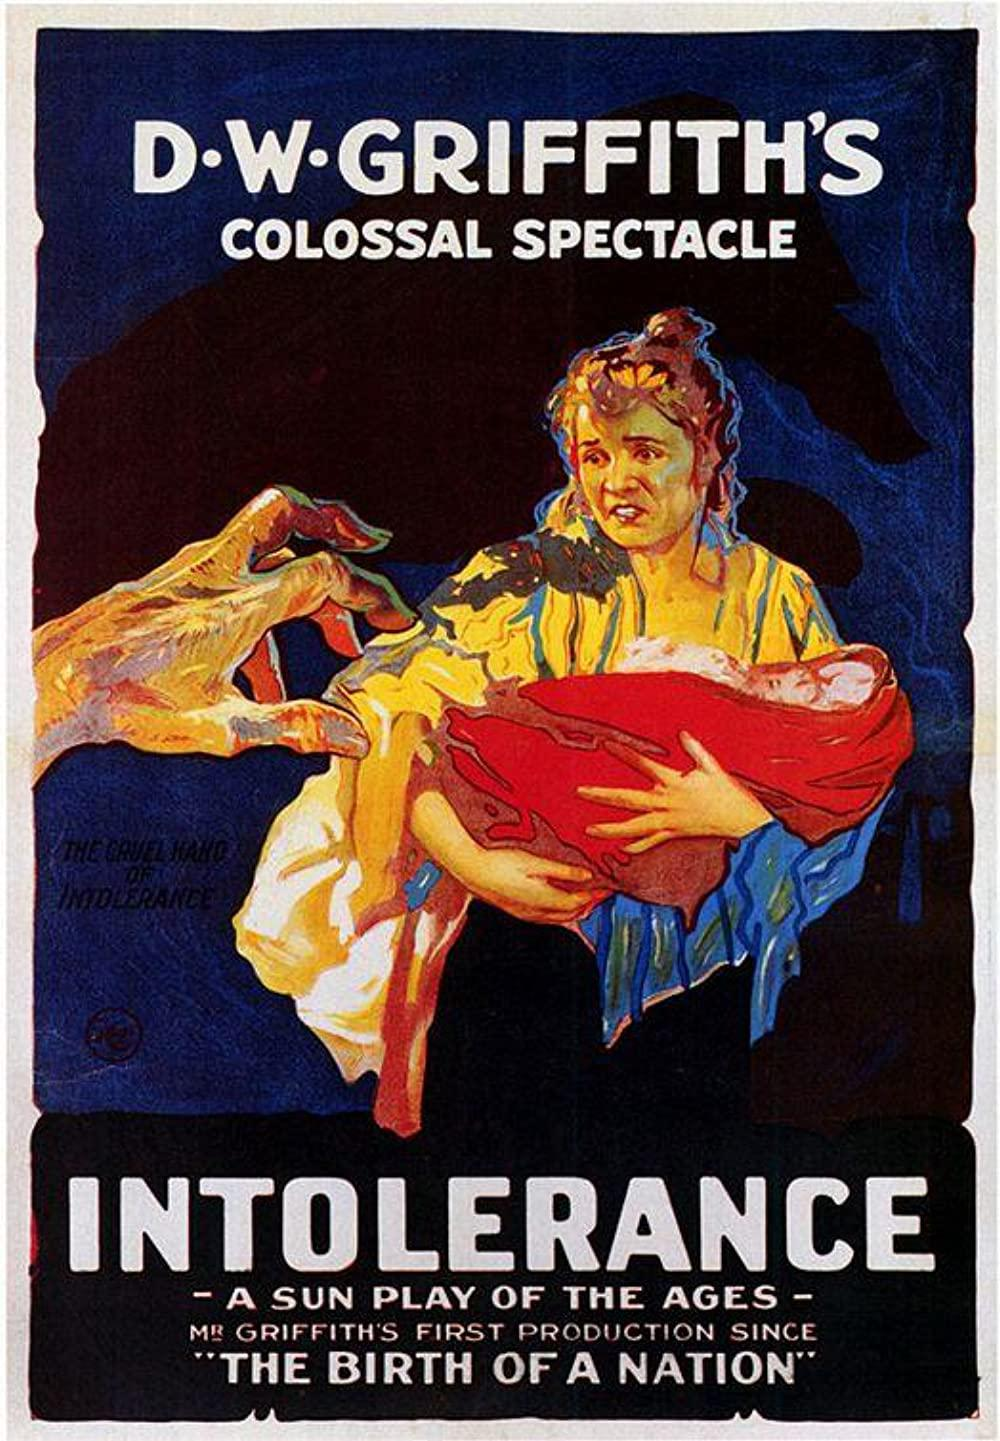

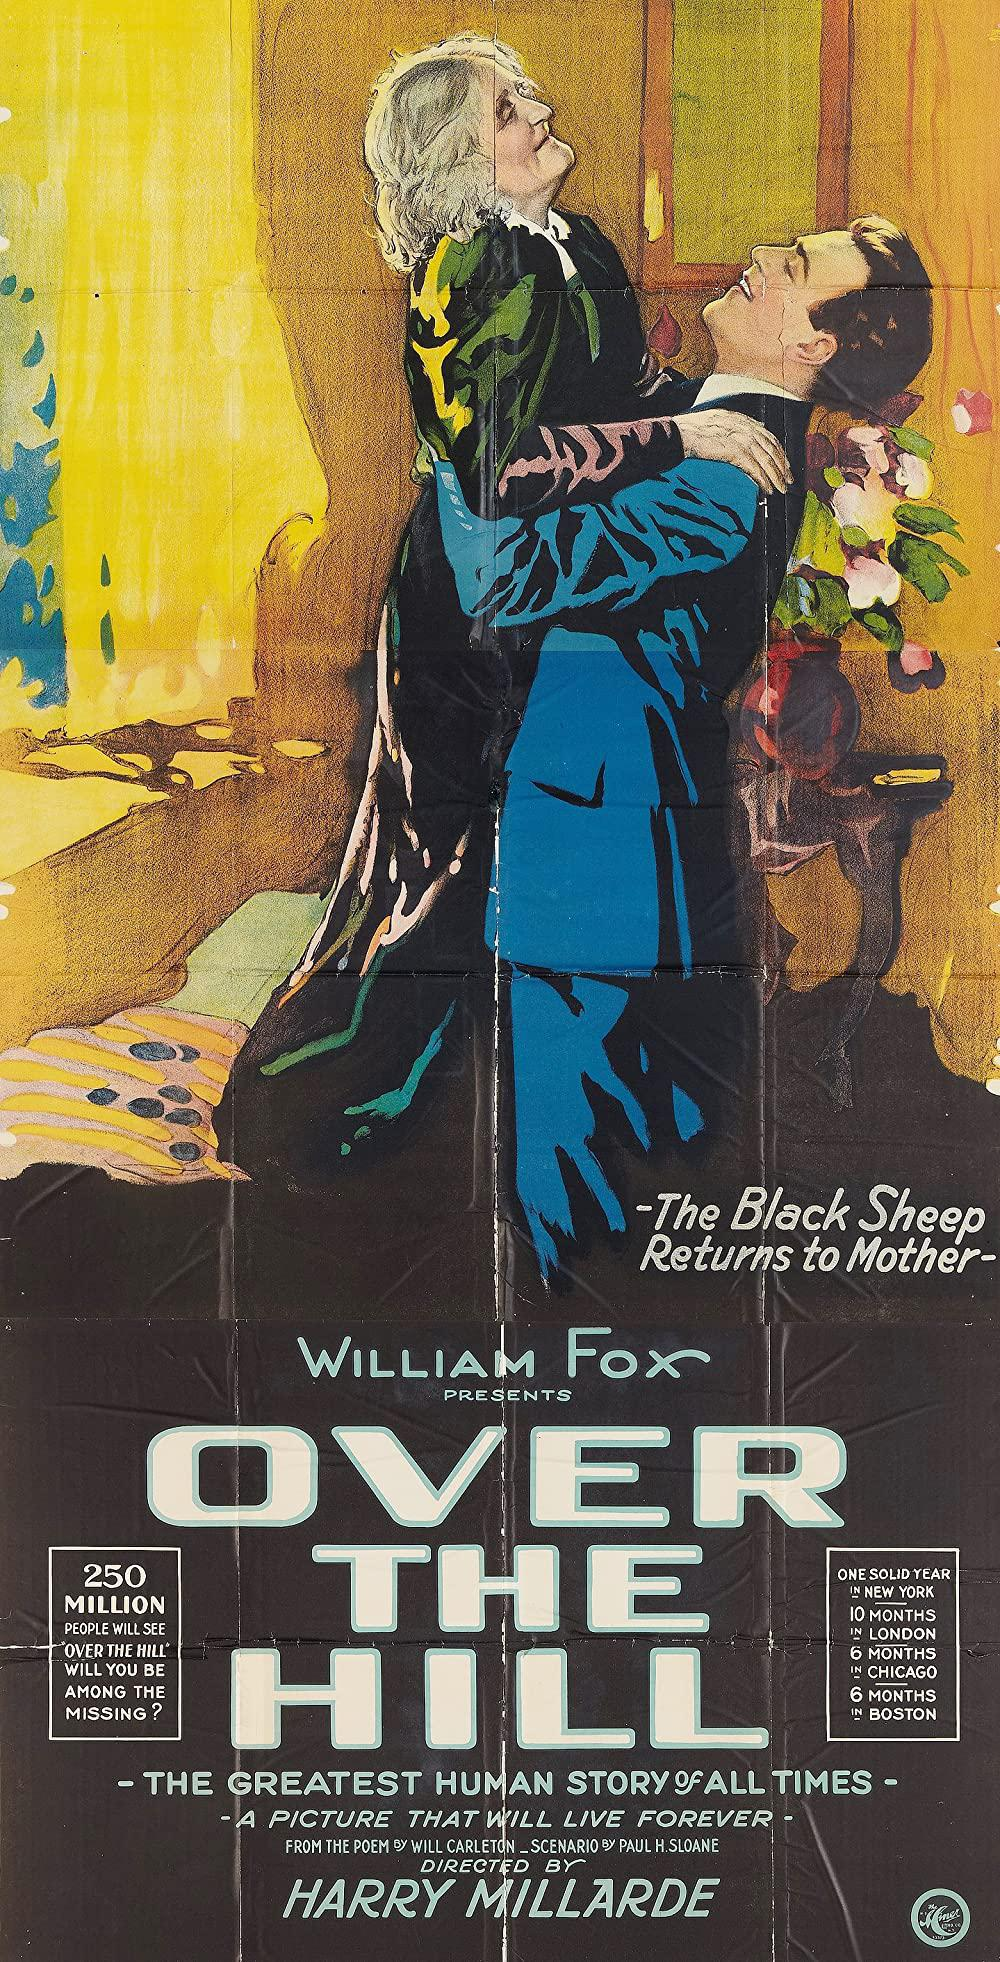

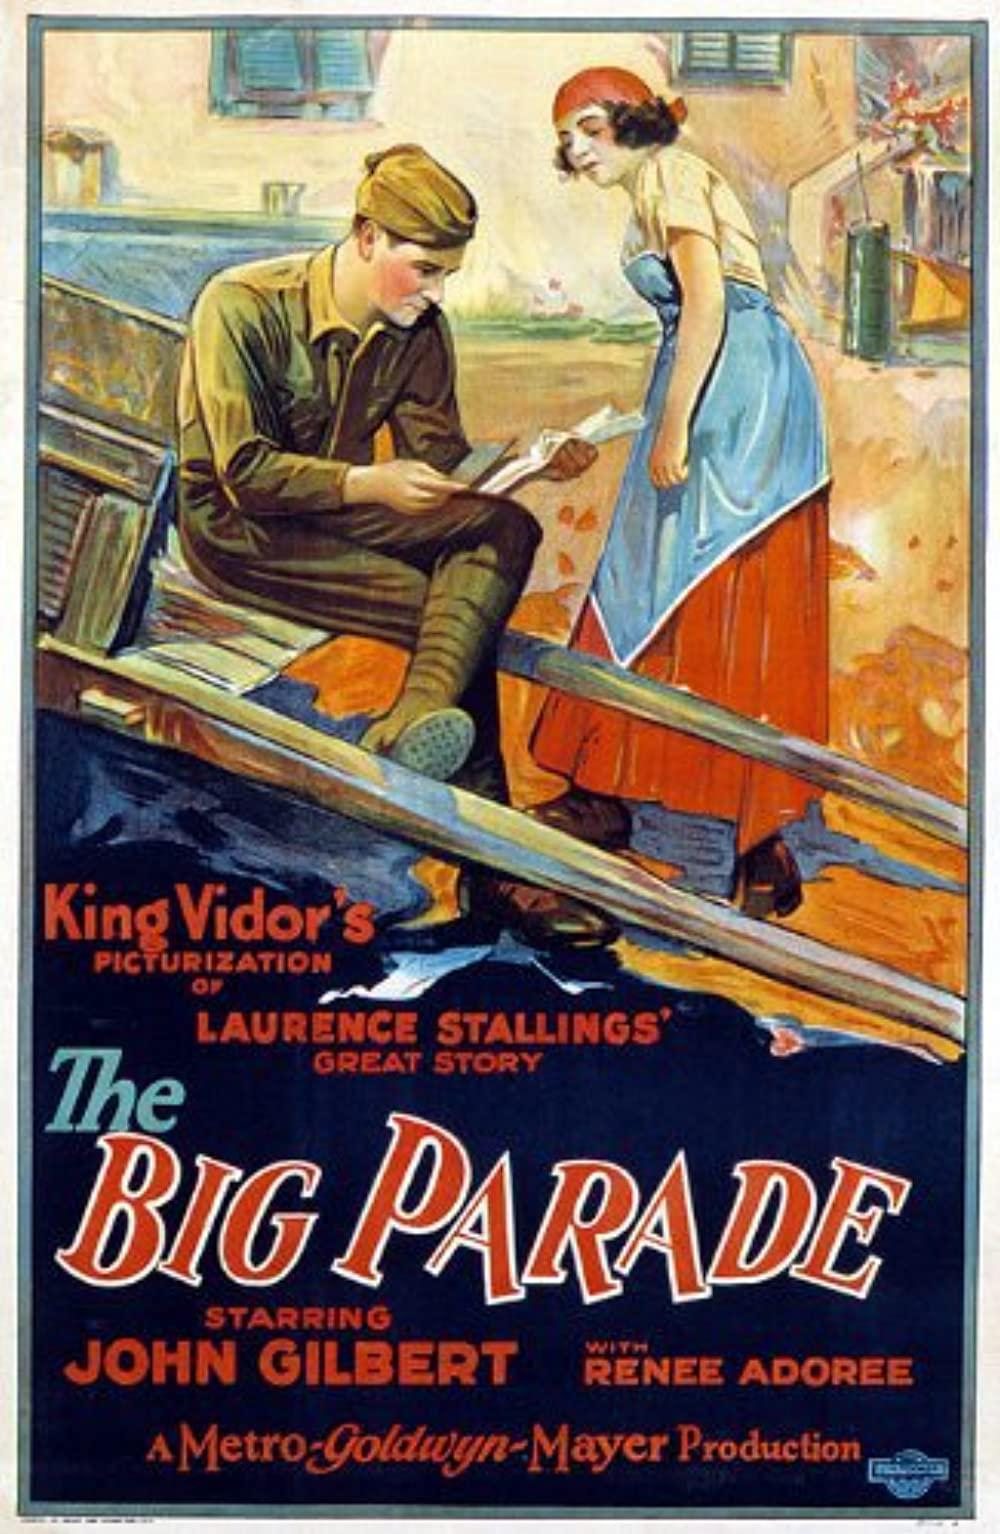

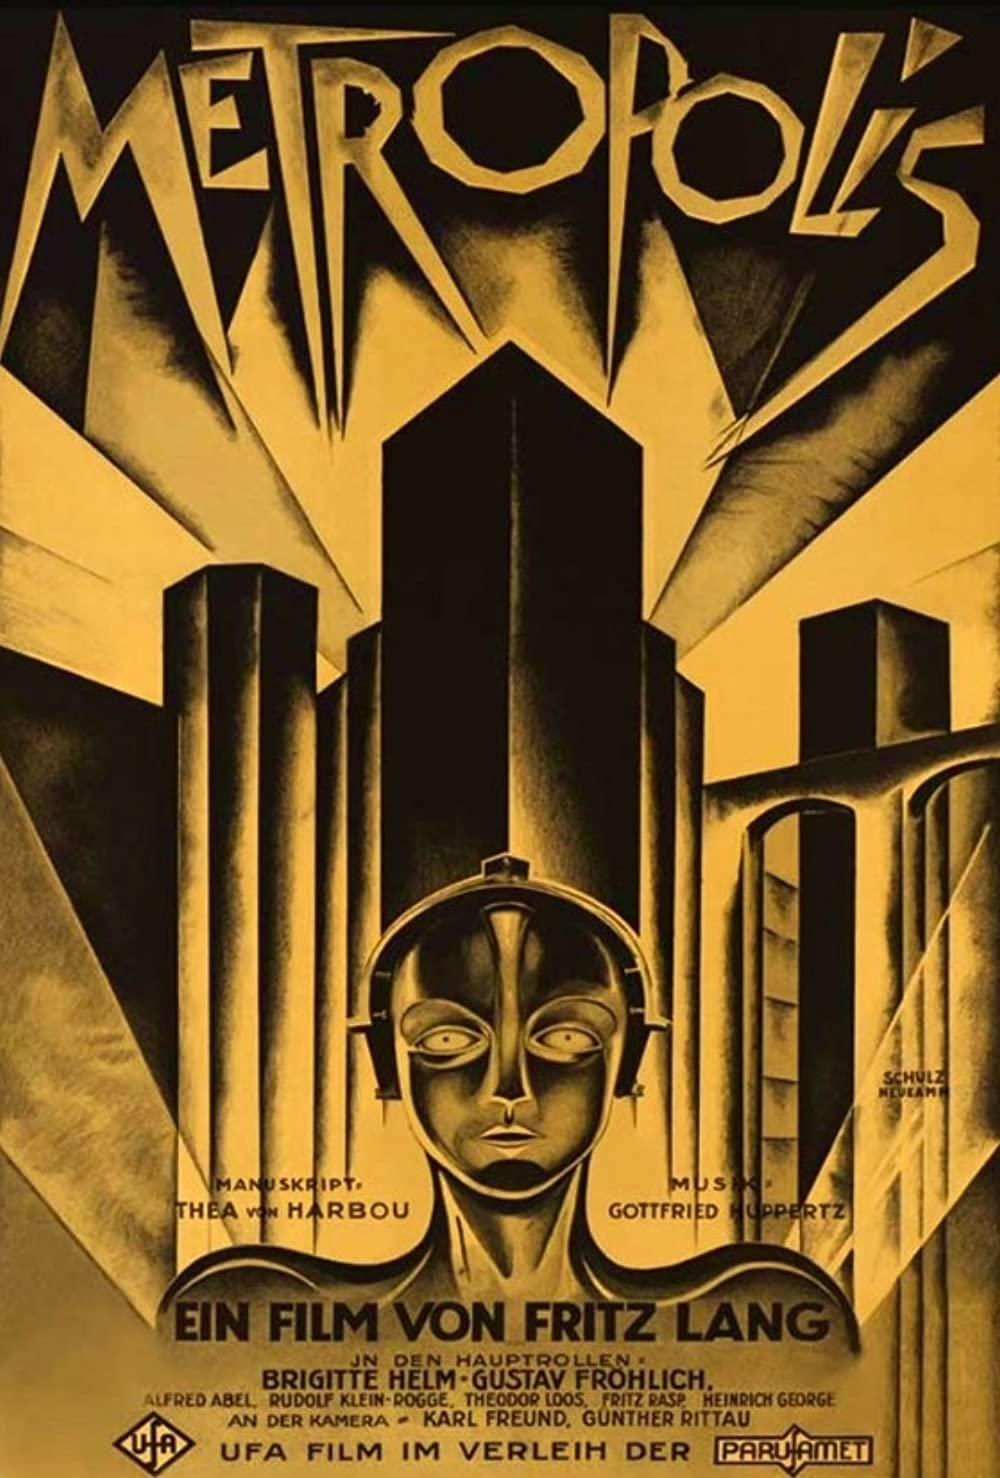

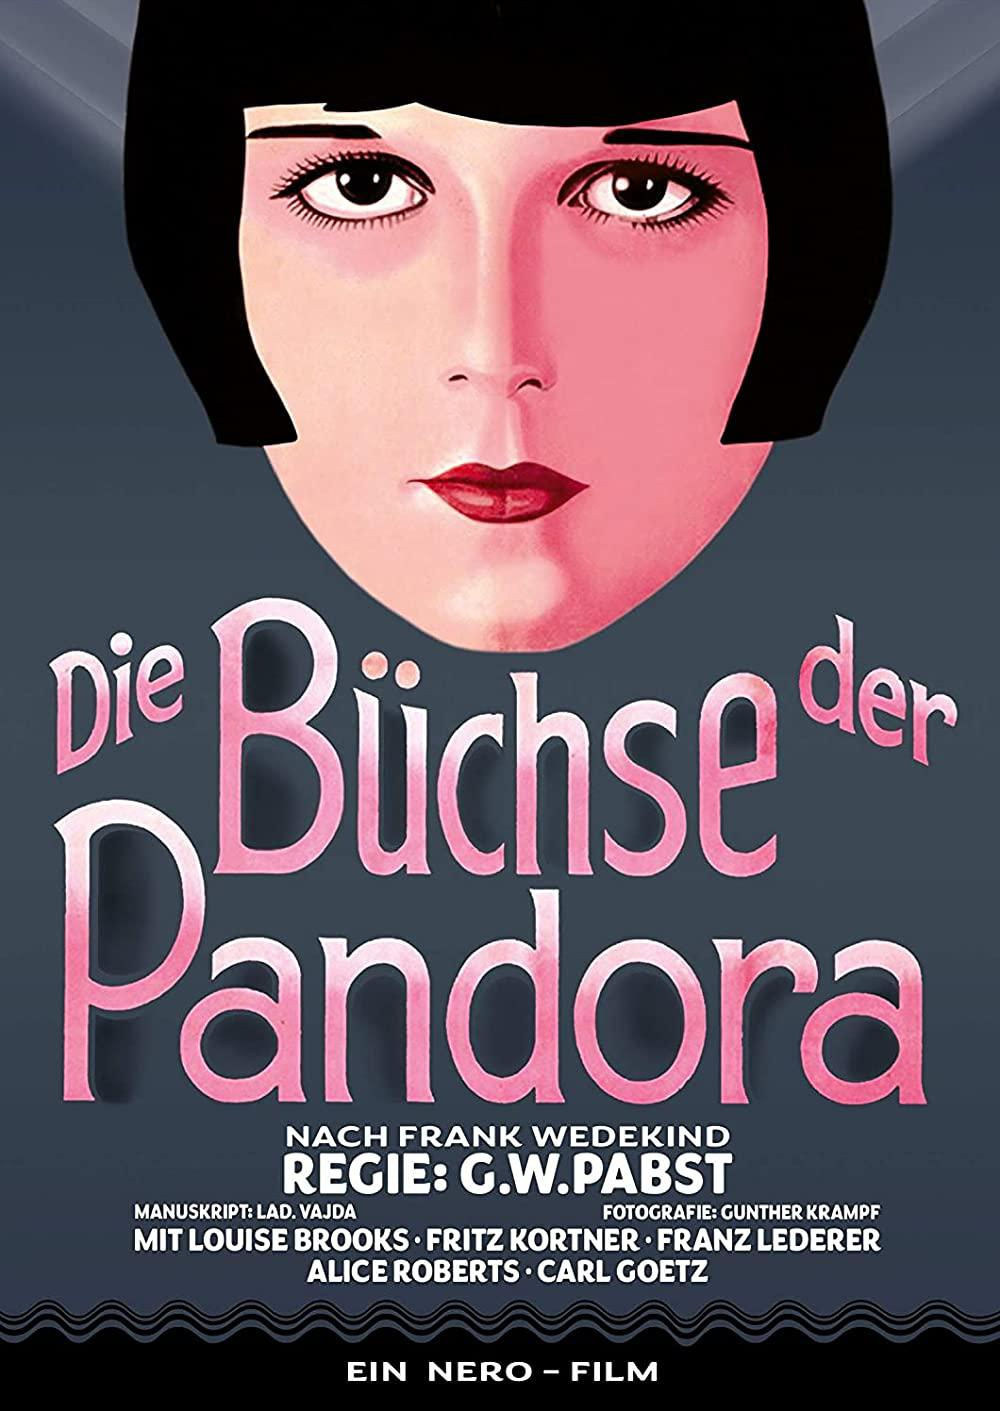

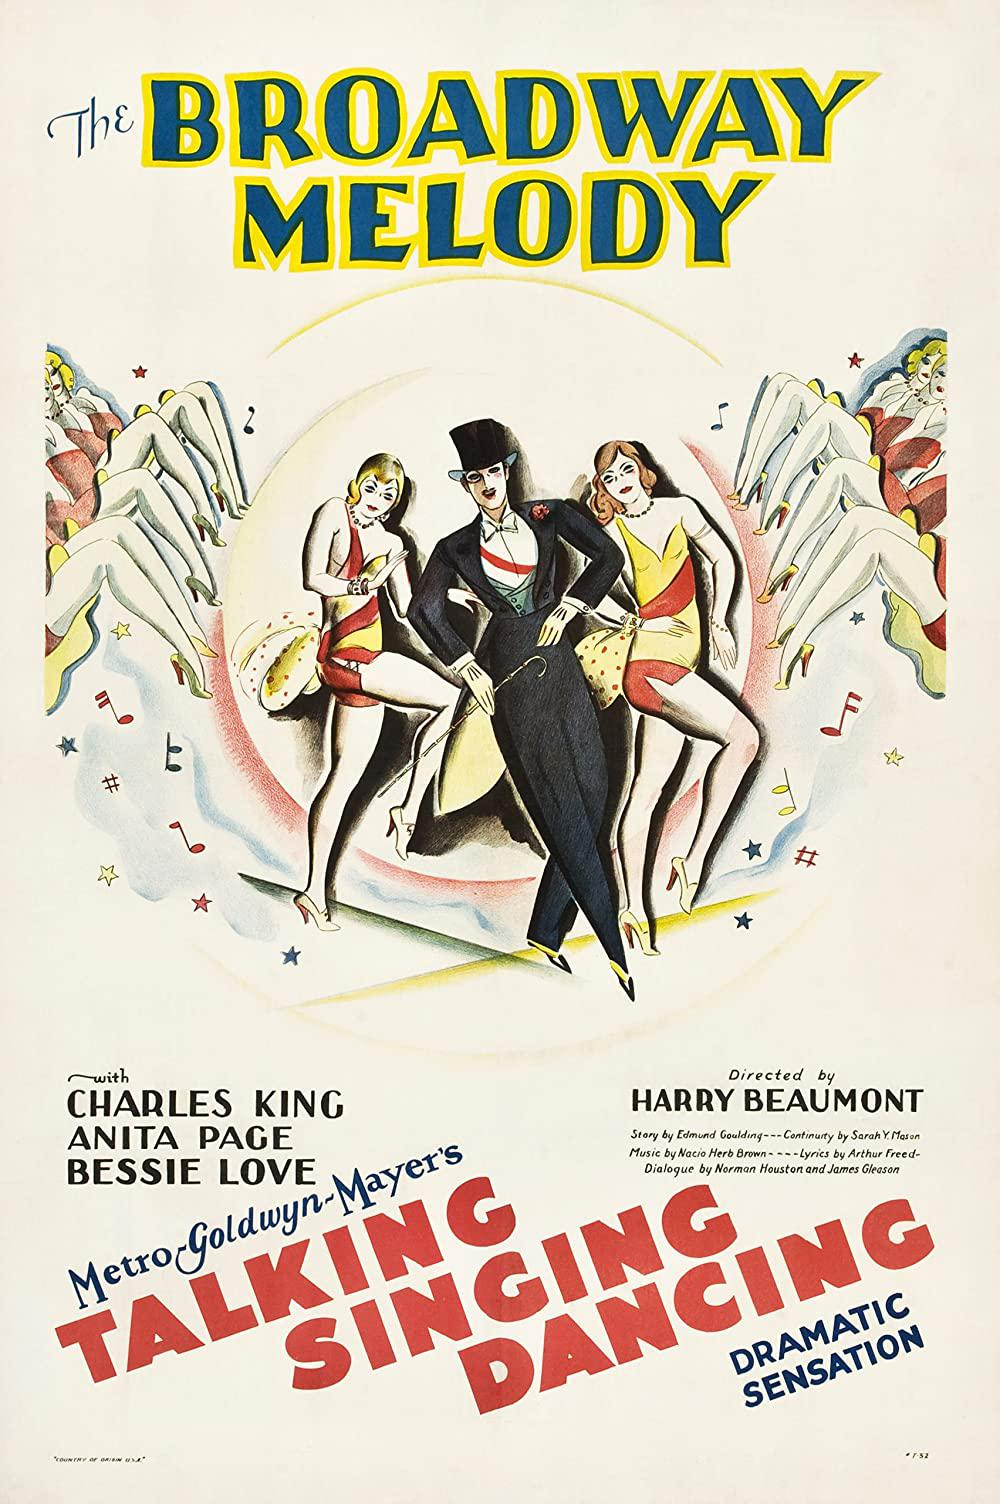

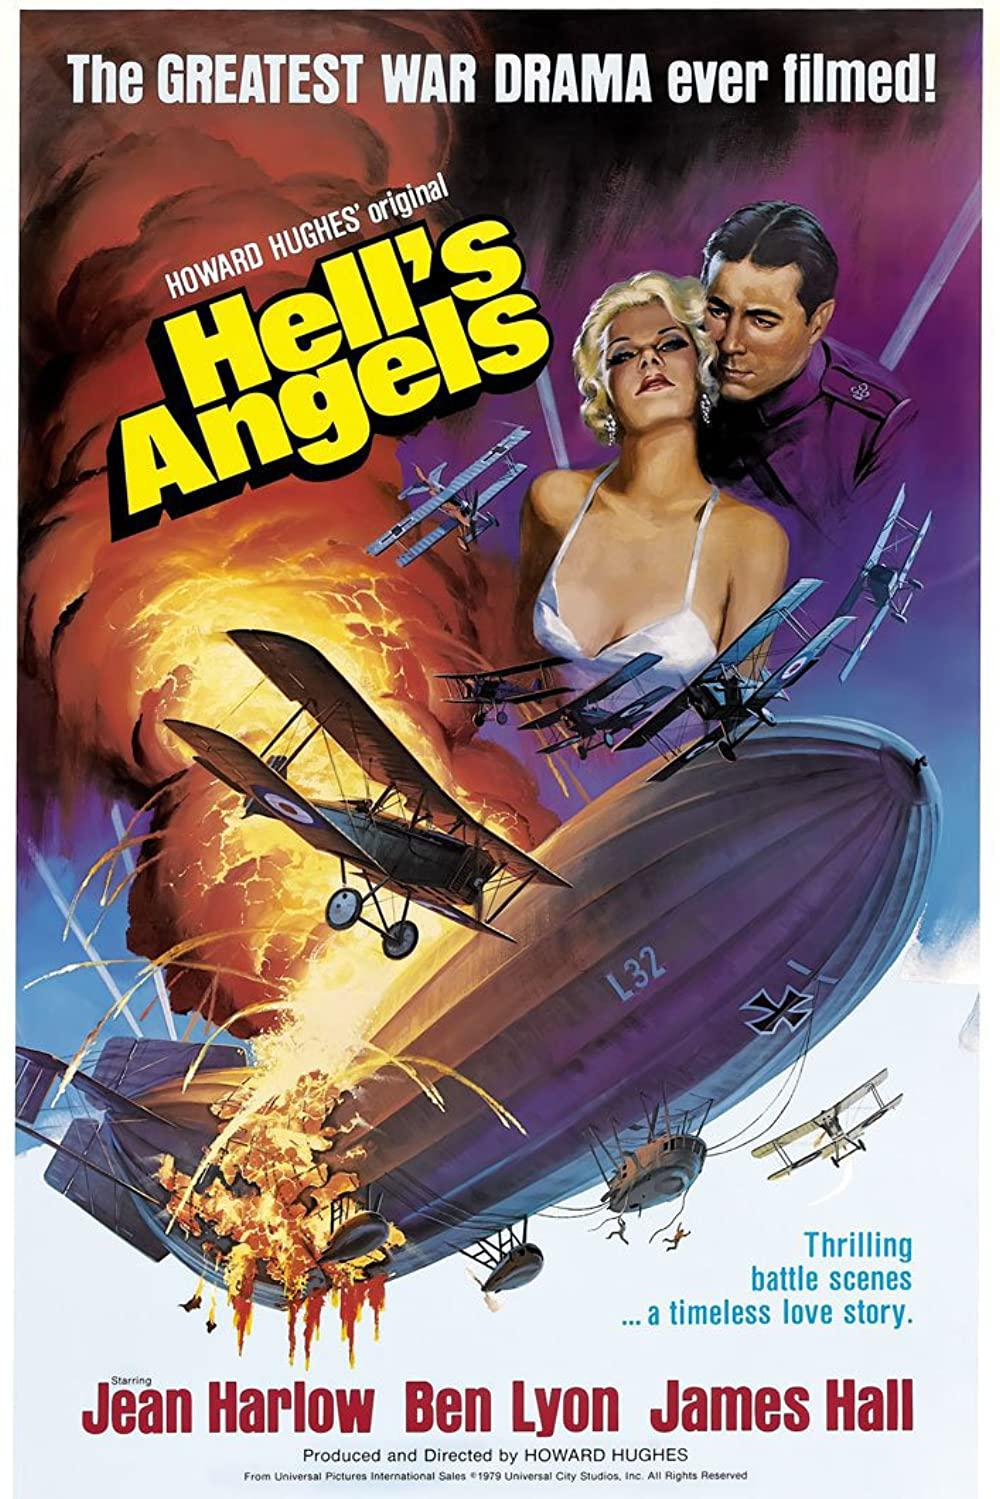

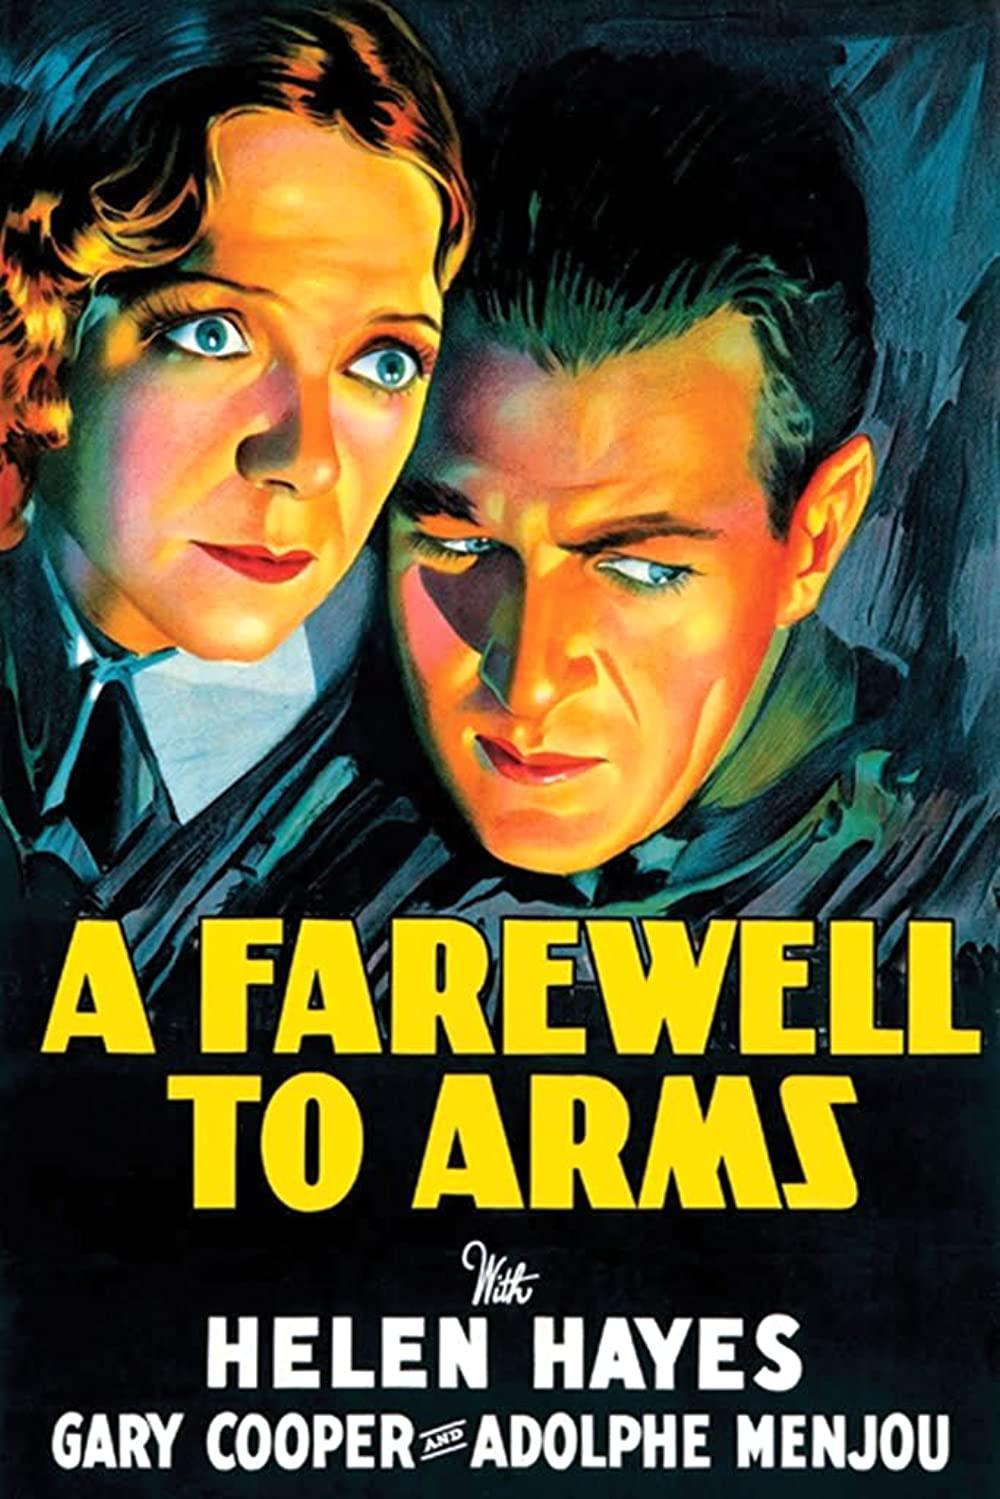

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import io
import PIL.Image
from IPython.display import Image as poster
from IPython.display import display

lists=open("/content/600 movies.txt","r")
list1 = lists.readlines()

def movie_poster_fetcher(imdb_link,index):
    ## Call to website using SDK
    url_data = client.get(imdb_link).text
    ## Fetch the site data
    s_data = BeautifulSoup(url_data, 'html.parser')
    ## Find the tag in which Image link is stored
    imdb_dp = s_data.find("meta", property="og:image")
    ## Get the URL of Image
    movie_poster_link = imdb_dp.attrs['content']
    u = urlopen(movie_poster_link)
    raw_data = u.read()
    # Fetch the Image from URL, and save it.
    file_name='image'+index
    image = PIL.Image.open(io.BytesIO(raw_data))
    image.save('/content/images/'+ file_name +'.jpg', 'JPEG')
    display(poster('/content/images/'+ file_name +'.jpg',width=158, height=301))

#Get the posters=  
for i in range(0,599):
      movie_poster_fetcher(list1[i],str(i))

      


In [ ]:
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/image279.jpg (deflated 1%)
  adding: content/images/image89.jpg (deflated 0%)
  adding: content/images/image321.jpg (deflated 4%)
  adding: content/images/image310.jpg (deflated 0%)
  adding: content/images/image83.jpg (deflated 1%)
  adding: content/images/image74.jpg (deflated 2%)
  adding: content/images/image482.jpg (deflated 0%)
  adding: content/images/image287.jpg (deflated 1%)
  adding: content/images/image417.jpg (deflated 0%)
  adding: content/images/image349.jpg (deflated 4%)
  adding: content/images/image94.jpg (deflated 2%)
  adding: content/images/image380.jpg (deflated 1%)
  adding: content/images/image554.jpg (deflated 0%)
  adding: content/images/image14.jpg (deflated 0%)
  adding: content/images/image152.jpg (deflated 1%)
  adding: content/images/image542.jpg (deflated 2%)
  adding: content/images/image16.jpg (deflated 0%)
  adding: content/images/image514.jpg (deflated 1%)
  adding: content/images/image19